# Analiza Danych Filmowych z TMDb
Ten notebook zawiera analizę danych filmowych z wykorzystaniem zbiorów danych TMDb.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
# Wczytywanie danych z plików CSV używając ścieżek względnych
movies_data = pd.read_csv('./tmdb_movies.csv')
genres_data = pd.read_csv('./tmdb_genres.csv')


In [48]:
#zmiana nazw
genres_data.columns = ['genre_id', 'genres']

# Konwersja daty premiery na format datetime i wyodrębnienie roku premiery
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'], errors='coerce')
movies_data['release_year'] = movies_data['release_date'].dt.year

# Konwersja typów danych
movies_data['genre_id'] = movies_data['genre_id'].astype(str)
genres_data['genre_id'] = genres_data['genre_id'].astype(str)

## Zadanie 1: Znalezienie 10 Najwyżej Ocenianych Filmów.


In [51]:
# Zadanie 1: Znalezienie 10 najwyżej ocenianych filmów z liczbą głosów powyżej 75. percentyla
vote_count_threshold = movies_data['vote_count'].quantile(0.75)
top_rated_movies = movies_data[movies_data['vote_count'] > vote_count_threshold].nlargest(10, 'vote_average')
top_rated_movies
genres_data

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


## Zadanie 2: Obliczenie Średnich Przychodów i Budżetów w Latach 2010-2016.


In [52]:

grouped_data = movies_data[(movies_data['release_year'] >= 2010) & (movies_data['release_year'] <= 2016)]


grouped_data = grouped_data.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'}).reset_index()
grouped_data['release_year'] = grouped_data['release_year'].astype(int)


grouped_data['revenue'] = grouped_data['revenue'].apply(lambda x: f"{x:,.2f}")
grouped_data['budget'] = grouped_data['budget'].apply(lambda x: f"{x:,.2f}")

grouped_data


,release_year,revenue,budget
0,2010,"90,438,110.08","34,495,410.94"
1,2011,"92,004,130.76","34,772,320.34"
2,2012,"116,065,914.64","34,922,031.99"
3,2013,"101,348,455.82","35,523,293.65"
4,2014,"101,346,599.11","30,959,887.86"
5,2015,"105,439,926.95","31,132,163.74"
6,2016,"139,049,586.04","45,703,269.23"


## Zadanie 3: Łączenie Danych o Filmach z Gatunkami


In [41]:
# Zadanie 3: Połączenie danych o filmach z danymi o gatunkach
merged_data = pd.merge(movies_data, genres_data, left_on='genre_id', right_on='genre_id', how='left')


## Zadanie 4: Znalezienie Najczęściej Występującego Gatunku


In [42]:
# Krok 1: Usunięcie wierszy, gdzie kolumna 'genres' ma wartość NaN
filtered_data = merged_data.dropna(subset=['genres'])

# Krok 2: Znalezienie najczęściej występującego gatunku
most_common_genre = filtered_data['genres'].value_counts().idxmax()
most_common_genre_count = filtered_data['genres'].value_counts().max()

# Wyświetlenie wyników
print(f"Najczęściej występujący gatunek filmu: {most_common_genre}")
print(f"Liczba filmów w tym gatunku: {most_common_genre_count}")



Najczęściej występujący gatunek filmu: Drama
Liczba filmów w tym gatunku: 1207


## Zadanie 5: Gatunek o Najdłuższym Średnim Czasie Trwania


In [43]:
# Zadanie 5: Znalezienie gatunku o najdłuższym średnim czasie trwania
longest_runtime_genre = merged_data.groupby('genres')['runtime'].mean().idxmax()
longest_runtime = merged_data.groupby('genres')['runtime'].mean().max()

print(f"Gatunek filmu o najdłuższym średnim czasie trwania: {longest_runtime_genre}")
print(f"Średni czas trwania: {longest_runtime} minut")


Gatunek filmu o najdłuższym średnim czasie trwania: History
Średni czas trwania: 133.96 minut


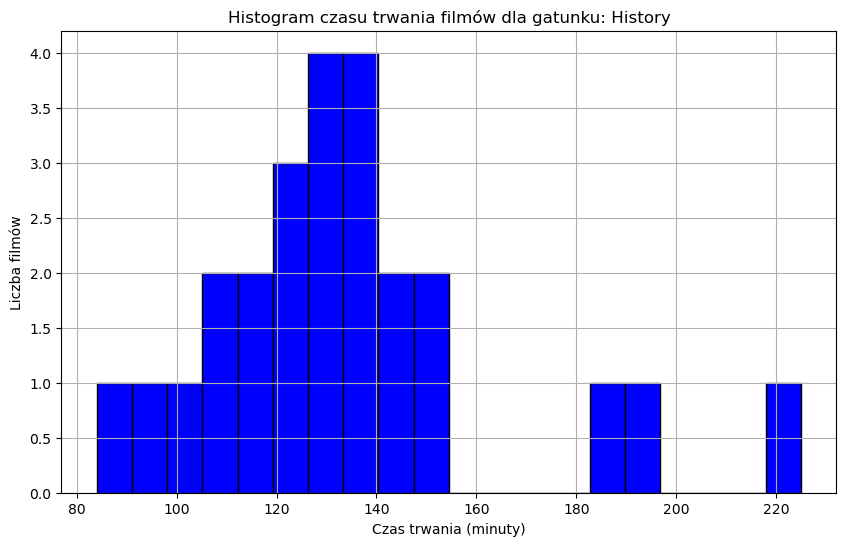

NameError: name 'show' is not defined

In [53]:
# Zadanie 6: Histogram Czasu Trwania Filmów 
longest_runtime_genre_data = merged_data[merged_data['genres'] == longest_runtime_genre]

plt.figure(figsize=(10, 6))
plt.hist(longest_runtime_genre_data['runtime'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title(f'Histogram czasu trwania filmów dla gatunku: {longest_runtime_genre}')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.grid(True)
plt.show()
show()
